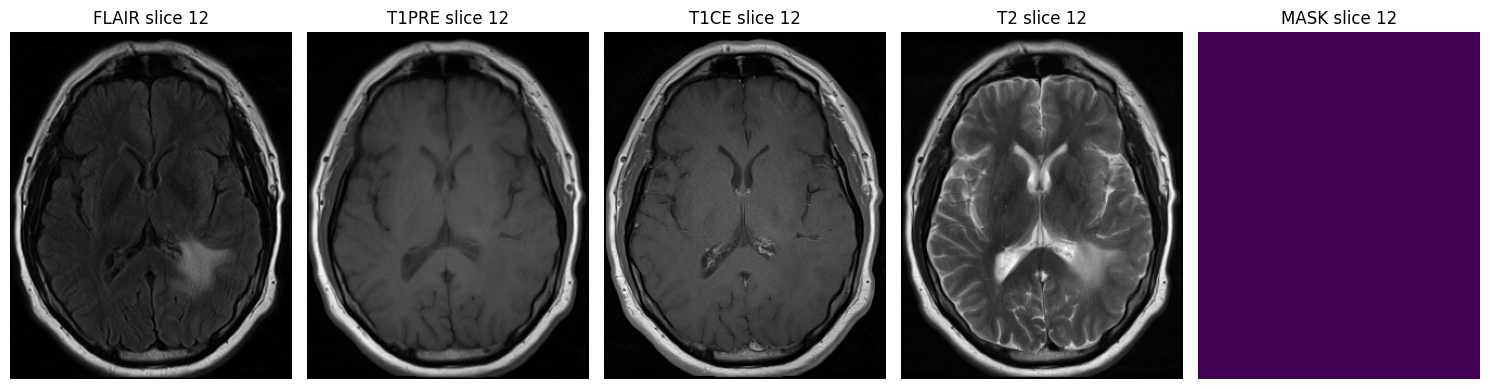

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

preproc_root = "../data/btp_preproc_full"
case_id      = "PGBM-001"

# 1) 경로 딕셔너리
fpath_dict = {
    m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
    for m in ["flair","t1pre","t1ce","t2","mask"]
}

# 2) 중간 slice 인덱스 (Z축)
#    BTP NIfTI 는 (slices, H, W) 이므로
sample = nib.load(fpath_dict["flair"]).get_fdata()   # shape = (ns, H, W)
z0 = sample.shape[0] // 2

# 3) plot
fig, axs = plt.subplots(1, 5, figsize=(15, 4))
for ax, m in zip(axs, ["flair","t1pre","t1ce","t2","mask"]):
    data = nib.load(fpath_dict[m]).get_fdata()
    slice_img = data[z0, :, :]                     

    ax.imshow(slice_img,
              cmap="gray" if m!="mask" else "viridis",
              aspect="equal")
    ax.set_title(f"{m.upper()} slice {z0}")
    ax.axis("off")

plt.tight_layout()
plt.show()


flair shape: (25, 320, 260)
t1pre shape: (25, 320, 260)
t1ce shape: (25, 320, 260)
t2 shape: (25, 320, 260)
mask shape: (25, 320, 260)


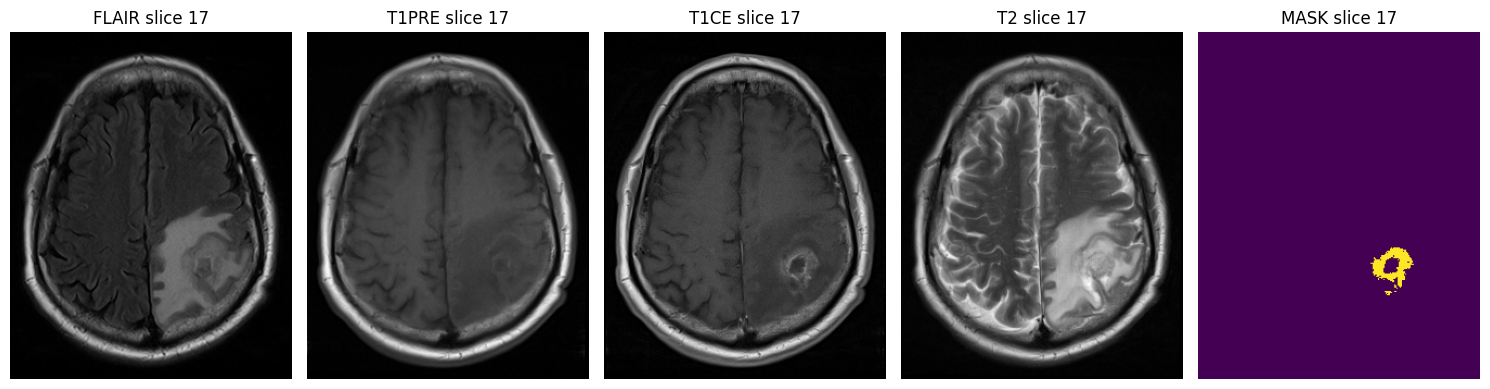

In [5]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

preproc_root = "../data/btp_preproc"
case_id      = "PGBM-001"

# 1) 경로
fpath_dict = {
    m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
    for m in ["flair","t1pre","t1ce","t2","mask"]
}

# 2) 슬라이스 방향 배열(shape) 확인
for mod, path in fpath_dict.items():
    arr = nib.load(path).get_fdata()
    print(f"{mod} shape:", arr.shape)
# 출력: flair (24, 320, 260), etc.

# 3) 마스크가 포함된 슬라이스 인덱스 중간(z0) 찾기
mask_arr = nib.load(fpath_dict["mask"]).get_fdata()
zs = np.where(mask_arr.sum(axis=(1,2)) > 0)[0]  # (slice,height,width) 이므로 axis=(1,2)
if len(zs)==0:
    raise RuntimeError("Mask is empty!")
z0 = zs[len(zs)//2]

# 4) 그리기
fig, axs = plt.subplots(1, 5, figsize=(15,5))
for ax, mod in zip(axs, ["flair","t1pre","t1ce","t2","mask"]):
    arr = nib.load(fpath_dict[mod]).get_fdata()
    slice_img = arr[z0, :, :]   # <-- (slice, H, W) 순서에 맞게!

    ax.imshow(slice_img,
              cmap="gray" if mod!="mask" else "viridis",
              aspect="equal")          # auto로 하면 화면 꽉 채워서 보기 좋음
    ax.set_title(f"{mod.upper()} slice {z0}")
    ax.axis("off")

plt.tight_layout()
plt.show()

flair shape: (25, 320, 260)
t1pre shape: (25, 320, 260)
t1ce shape: (25, 320, 260)
t2 shape: (25, 320, 260)
mask shape: (25, 320, 260)


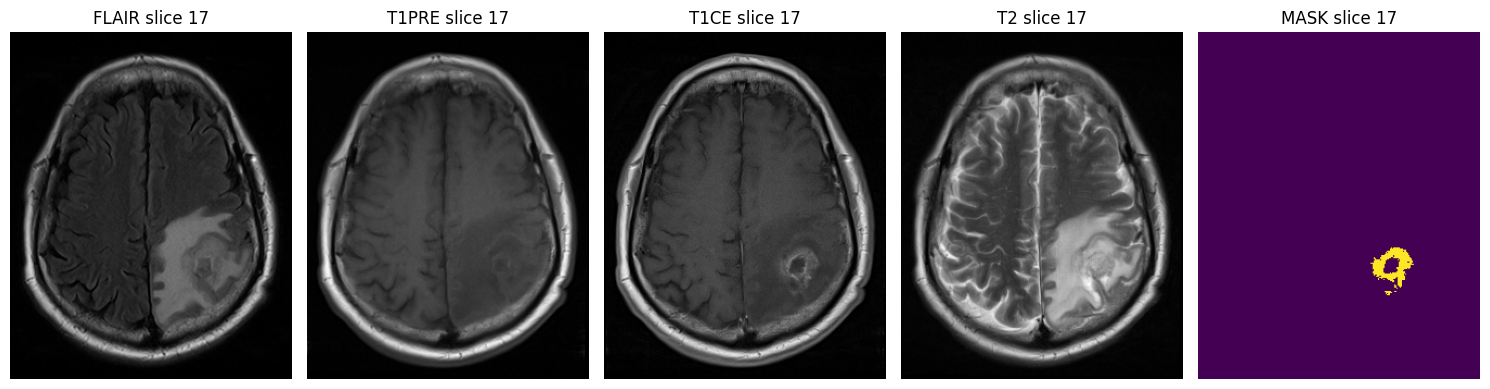

In [11]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

preproc_root = "../data/btp_preproc"
case_id      = "PGBM-001"

# 1) 경로
fpath_dict = {
    m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
    for m in ["flair","t1pre","t1ce","t2","mask"]
}

# 2) 슬라이스 방향 배열(shape) 확인
for mod, path in fpath_dict.items():
    arr = nib.load(path).get_fdata()
    print(f"{mod} shape:", arr.shape)
# 출력: flair (24, 320, 260), etc.

# 3) 마스크가 포함된 슬라이스 인덱스 중간(z0) 찾기
mask_arr = nib.load(fpath_dict["mask"]).get_fdata()
zs = np.where(mask_arr.sum(axis=(1,2)) > 0)[0]  # (slice,height,width) 이므로 axis=(1,2)
if len(zs)==0:
    raise RuntimeError("Mask is empty!")
z0 = zs[len(zs)//2]

# 4) 그리기
fig, axs = plt.subplots(1, 5, figsize=(15,5))
for ax, mod in zip(axs, ["flair","t1pre","t1ce","t2","mask"]):
    arr = nib.load(fpath_dict[mod]).get_fdata()
    slice_img = arr[z0, :, :]   # <-- (slice, H, W) 순서에 맞게!

    ax.imshow(slice_img,
              cmap="gray" if mod!="mask" else "viridis",
              aspect="equal")          # auto로 하면 화면 꽉 채워서 보기 좋음
    ax.set_title(f"{mod.upper()} slice {z0}")
    ax.axis("off")

plt.tight_layout()
plt.show()

flair shape: (25, 320, 260)
t1pre shape: (25, 320, 260)
t1ce shape: (25, 320, 260)
t2 shape: (25, 320, 260)
mask shape: (25, 320, 260)


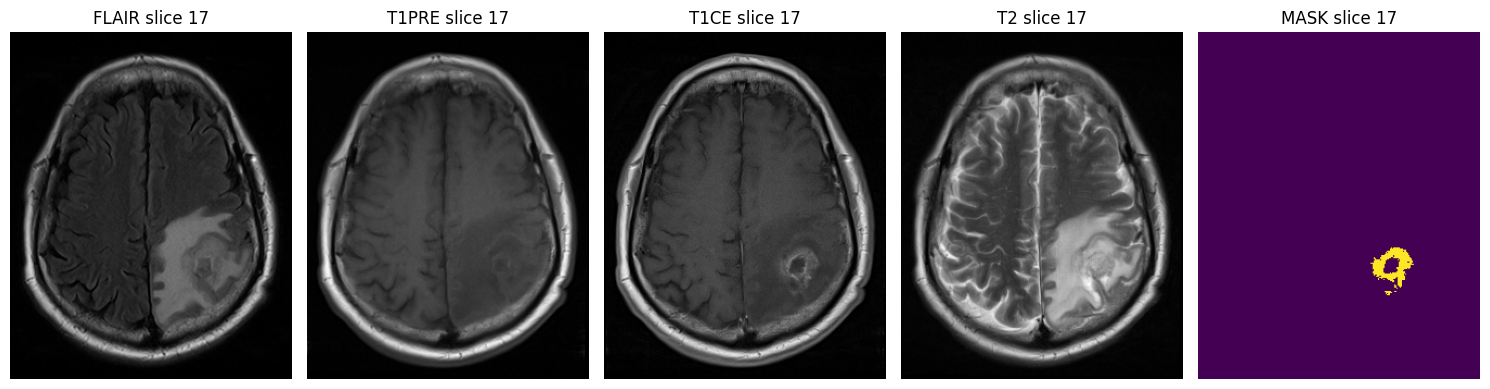

In [12]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

preproc_root = "../data/btp_preproc"
case_id      = "PGBM-001"

# 1) 경로
fpath_dict = {
    m: os.path.join(preproc_root, case_id, f"{m}.nii.gz")
    for m in ["flair","t1pre","t1ce","t2","mask"]
}

# 2) 슬라이스 방향 배열(shape) 확인
for mod, path in fpath_dict.items():
    arr = nib.load(path).get_fdata()
    print(f"{mod} shape:", arr.shape)
# 출력: flair (24, 320, 260), etc.

# 3) 마스크가 포함된 슬라이스 인덱스 중간(z0) 찾기
mask_arr = nib.load(fpath_dict["mask"]).get_fdata()
zs = np.where(mask_arr.sum(axis=(1,2)) > 0)[0]  # (slice,height,width) 이므로 axis=(1,2)
if len(zs)==0:
    raise RuntimeError("Mask is empty!")
z0 = zs[len(zs)//2]

# 4) 그리기
fig, axs = plt.subplots(1, 5, figsize=(15,5))
for ax, mod in zip(axs, ["flair","t1pre","t1ce","t2","mask"]):
    arr = nib.load(fpath_dict[mod]).get_fdata()
    slice_img = arr[z0, :, :]   # <-- (slice, H, W) 순서에 맞게!

    ax.imshow(slice_img,
              cmap="gray" if mod!="mask" else "viridis",
              aspect="equal")          # auto로 하면 화면 꽉 채워서 보기 좋음
    ax.set_title(f"{mod.upper()} slice {z0}")
    ax.axis("off")

plt.tight_layout()
plt.show()

[PGBM-001] using subdir: 11-19-1991-FH-HEADBrain Protocols-40993
flair shape: (162, 179, 220)
t1pre shape: (162, 179, 220)
t1ce shape: (162, 179, 220)
t2 shape: (162, 179, 220)
mask shape: (162, 179, 220)
Showing slice: 114


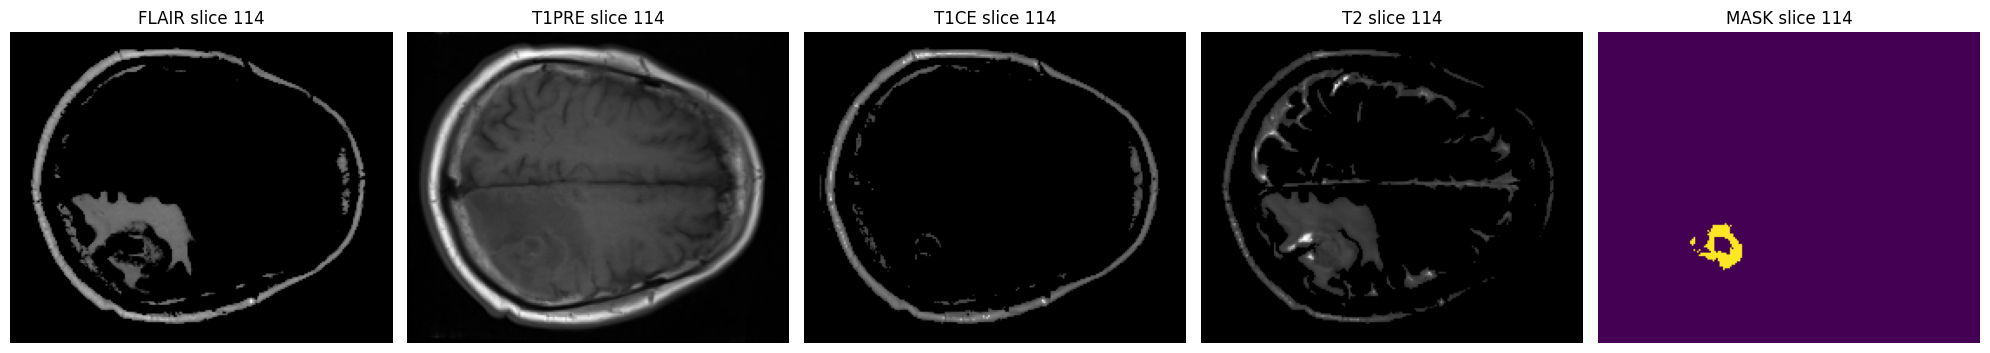

In [8]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id     : 케이스 이름 (예: "PGBM-001")
    mods        : ["flair","t1pre","t1ce","t2","mask"] 등
    """
    if mods is None:
        mods = ["flair","t1pre","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 1) case_dir 안의 날짜별 하위폴더 찾기
    subs = [d for d in os.listdir(case_dir)
            if os.path.isdir(os.path.join(case_dir, d))]
    if not subs:
        raise RuntimeError(f"No subdirectories under {case_dir}")
    # 2) 서브디렉토리 정렬 후 하나 선택 (가장 마지막: 최신 날짜라고 가정)
    subs_sorted = sorted(subs)
    chosen = subs_sorted[-1]
    print(f"[{case_id}] using subdir:", chosen)
    data_dir = os.path.join(case_dir, chosen)

    # 3) 파일 경로 딕셔너리
    fpaths = {
        m: os.path.join(data_dir, f"{m}.nii.gz")
        for m in mods
    }

    # 4) shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape:", arr.shape)

    # 5) 중간 slice 인덱스 (mask와 동일)
    mask = nib.load(fpaths["mask"]).get_fdata()
    zs = np.where(mask.sum(axis=(1,2)) > 0)[0]
    if len(zs)==0:
        raise RuntimeError("Mask is empty!")
    z0 = zs[len(zs)//2]
    print("Showing slice:", z0)

    # 6) 그리기
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods), 4))
    for ax, m in zip(axs, mods):
        arr = nib.load(fpaths[m]).get_fdata()
        # BTP는 arr.shape == (Z, H, W) 순서이므로 arr[z0,:,:]
        img2d = arr[z0, :, :]
        cmap = "gray" if m!="mask" else "viridis"
        ax.imshow(img2d, cmap=cmap, aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# ───────────────────────────────────────────────────────────────
# 사용 예시
btp_root = "../data/btp_preproc_new"
show_btp_case(btp_root, "PGBM-001")


[PGBM-001] using subdir: 11-19-1991-FH-HEADBrain Protocols-40993
flair shape: (162, 220, 179)
t1 shape: (162, 220, 179)
t1ce shape: (162, 220, 179)
t2 shape: (162, 220, 179)
mask shape: (162, 220, 179)
Showing slice: 114


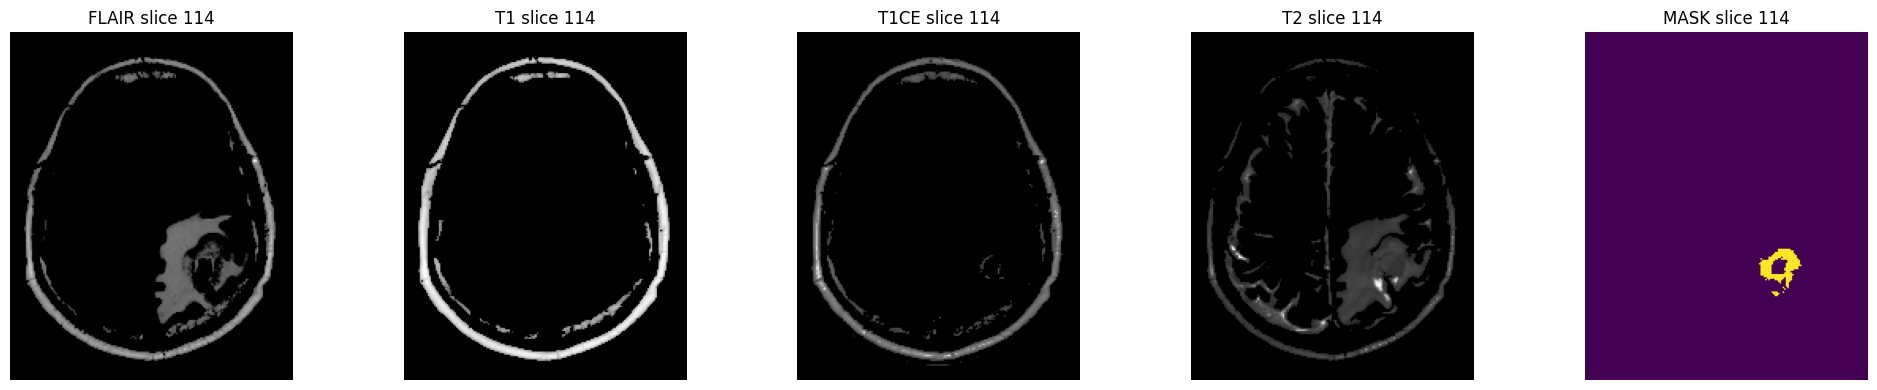

In [10]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id     : 케이스 이름 (예: "PGBM-001")
    mods        : ["flair","t1","t1ce","t2","mask"] 등
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 1) case_dir 안의 날짜별 하위폴더 찾기
    subs = [d for d in os.listdir(case_dir)
            if os.path.isdir(os.path.join(case_dir, d))]
    if not subs:
        raise RuntimeError(f"No subdirectories under {case_dir}")
    # 2) 서브디렉토리 정렬 후 하나 선택 (가장 마지막: 최신 날짜라고 가정)
    subs_sorted = sorted(subs)
    chosen = subs_sorted[-1]
    print(f"[{case_id}] using subdir:", chosen)
    data_dir = os.path.join(case_dir, chosen)

    # 3) 파일 경로 딕셔너리
    fpaths = {
        m: os.path.join(data_dir, f"{m}.nii.gz")
        for m in mods
    }

    # 4) shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape:", arr.shape)

    # 5) 중간 slice 인덱스 (mask와 동일)
    mask = nib.load(fpaths["mask"]).get_fdata()
    zs = np.where(mask.sum(axis=(1,2)) > 0)[0]
    if len(zs)==0:
        raise RuntimeError("Mask is empty!")
    z0 = zs[len(zs)//2]
    print("Showing slice:", z0)

    # 6) 그리기
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods), 4))
    for ax, m in zip(axs, mods):
        arr = nib.load(fpaths[m]).get_fdata()
        # BTP는 arr.shape == (Z, H, W) 순서이므로 arr[z0,:,:]
        img2d = arr[z0, :, :]
        cmap = "gray" if m!="mask" else "viridis"
        ax.imshow(img2d, cmap=cmap, aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# ───────────────────────────────────────────────────────────────
# 사용 예시
btp_root = "../data/btp_preproc_new"
show_btp_case(btp_root, "PGBM-001")


[PGBM-001] using subdir: 11-19-1991-FH-HEADBrain Protocols-40993
flair shape: (162, 220, 179)
t1 shape: (162, 220, 179)
t1ce shape: (162, 220, 179)
t2 shape: (162, 220, 179)
mask shape: (162, 220, 179)
Showing slice: 114


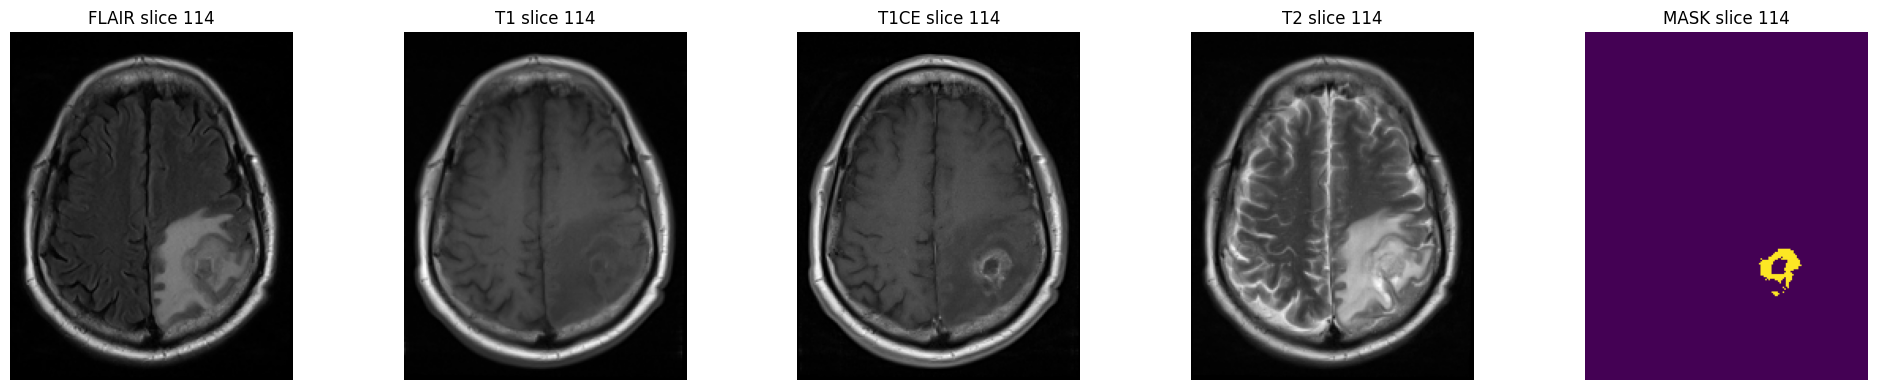

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id     : 케이스 이름 (예: "PGBM-001")
    mods        : ["flair","t1","t1ce","t2","mask"] 등
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 1) case_dir 안의 날짜별 하위폴더 찾기
    subs = [d for d in os.listdir(case_dir)
            if os.path.isdir(os.path.join(case_dir, d))]
    if not subs:
        raise RuntimeError(f"No subdirectories under {case_dir}")
    # 2) 서브디렉토리 정렬 후 하나 선택 (가장 마지막: 최신 날짜라고 가정)
    subs_sorted = sorted(subs)
    chosen = subs_sorted[-1]
    print(f"[{case_id}] using subdir:", chosen)
    data_dir = os.path.join(case_dir, chosen)

    # 3) 파일 경로 딕셔너리
    fpaths = {
        m: os.path.join(data_dir, f"{m}.nii.gz")
        for m in mods
    }

    # 4) shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape:", arr.shape)

    # 5) 중간 slice 인덱스 (mask와 동일)
    mask = nib.load(fpaths["mask"]).get_fdata()
    zs = np.where(mask.sum(axis=(1,2)) > 0)[0]
    if len(zs)==0:
        raise RuntimeError("Mask is empty!")
    z0 = zs[len(zs)//2]
    print("Showing slice:", z0)

    # 6) 그리기
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods), 4))
    for ax, m in zip(axs, mods):
        arr = nib.load(fpaths[m]).get_fdata()
        # BTP는 arr.shape == (Z, H, W) 순서이므로 arr[z0,:,:]
        img2d = arr[z0, :, :]
        cmap = "gray" if m!="mask" else "viridis"
        ax.imshow(img2d, cmap=cmap, aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# ───────────────────────────────────────────────────────────────
# 사용 예시
btp_root = "../data/btp_preproc_new"
show_btp_case(btp_root, "PGBM-001")


[PGBM-001] using subdir: 04-02-1992-FH-HEADBrain Protocols-79896
flair shape: (156, 220, 179)
t1 shape: (156, 220, 179)
t1ce shape: (156, 220, 179)
t2 shape: (156, 220, 179)
mask shape: (156, 220, 179)
Showing slice: 112


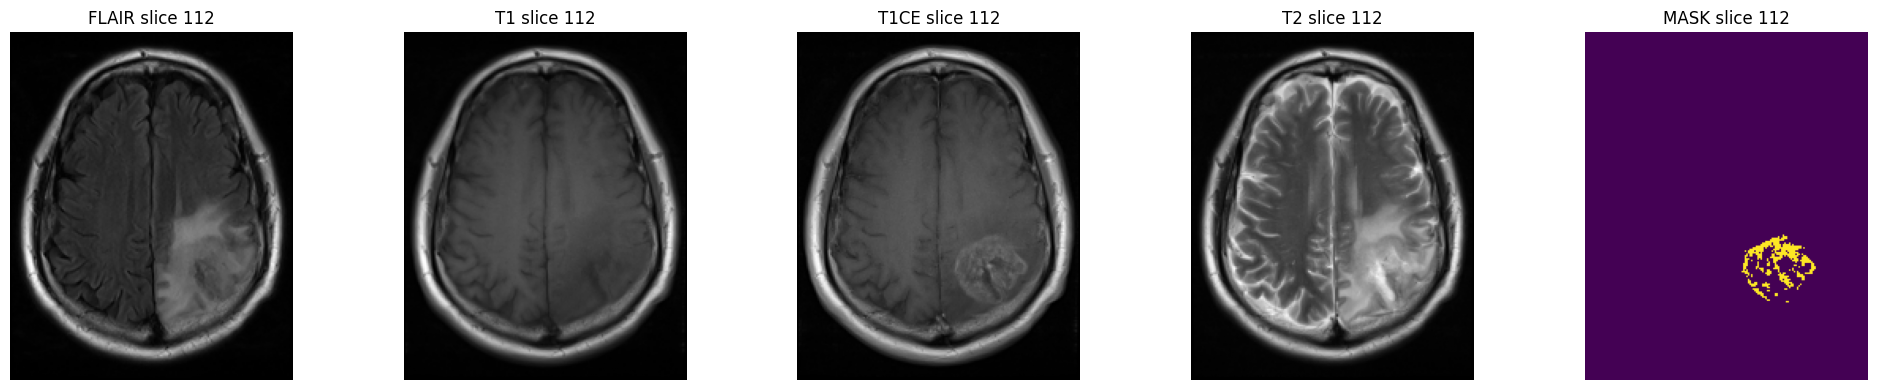

In [17]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id     : 케이스 이름 (예: "PGBM-001")
    mods        : ["flair","t1","t1ce","t2","mask"] 등
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 1) case_dir 안의 날짜별 하위폴더 찾기
    subs = [d for d in os.listdir(case_dir)
            if os.path.isdir(os.path.join(case_dir, d))]
    if not subs:
        raise RuntimeError(f"No subdirectories under {case_dir}")
    # 2) 서브디렉토리 정렬 후 하나 선택 (가장 마지막: 최신 날짜라고 가정)
    subs_sorted = sorted(subs)
    chosen = subs_sorted[0]
    print(f"[{case_id}] using subdir:", chosen)
    data_dir = os.path.join(case_dir, chosen)

    # 3) 파일 경로 딕셔너리
    fpaths = {
        m: os.path.join(data_dir, f"{m}.nii.gz")
        for m in mods
    }

    # 4) shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape:", arr.shape)

    # 5) 중간 slice 인덱스 (mask와 동일)
    mask = nib.load(fpaths["mask"]).get_fdata()
    zs = np.where(mask.sum(axis=(1,2)) > 0)[0]
    if len(zs)==0:
        raise RuntimeError("Mask is empty!")
    z0 = zs[len(zs)//2]
    print("Showing slice:", z0)

    # 6) 그리기
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods), 4))
    for ax, m in zip(axs, mods):
        arr = nib.load(fpaths[m]).get_fdata()
        # BTP는 arr.shape == (Z, H, W) 순서이므로 arr[z0,:,:]
        img2d = arr[z0, :, :]
        cmap = "gray" if m!="mask" else "viridis"
        ax.imshow(img2d, cmap=cmap, aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# ───────────────────────────────────────────────────────────────
# 사용 예시
btp_root = "../data/btp_preproc_new"
show_btp_case(btp_root, "PGBM-001")


flair shape: (240, 240, 156)
t1 shape: (240, 240, 156)
t1ce shape: (240, 240, 156)
t2 shape: (240, 240, 156)
mask shape: (240, 240, 156)


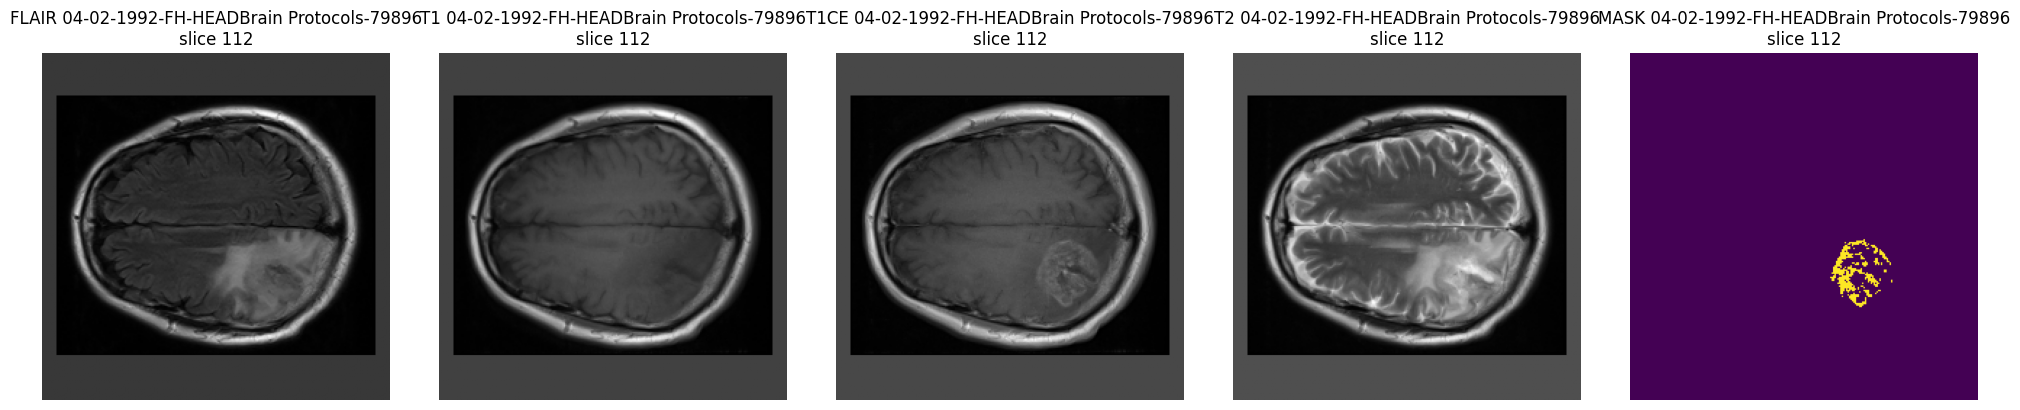

In [21]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id:      PGBM-001 처럼 케이스 이름
    date_folder:  "04-02-1992-..." 처럼 날짜별 서브폴더. None이면 첫 번째를 자동 선택
    mods:         시각화할 모달리티 리스트. 기본 ['flair','t1','t1ce','t2','mask']
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 날짜별 서브디렉토리 목록
    dates = sorted([d for d in os.listdir(case_dir)
                    if os.path.isdir(os.path.join(case_dir,d))])
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    # 각 모달리티 파일 경로
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 파일의 shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")

    # 2) 마스크가 있는 축(z) 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()
    # saved as (X, Y, Z)
    zs = np.where(mask.sum(axis=(0,1)) > 0)[0]
    if len(zs)>0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[2]//2

    # 3) 플롯
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods), 4))
    for ax, m in zip(axs, mods):
        img = nib.load(fpaths[m]).get_fdata()
        slice2d = img[:, :, z0]
        ax.imshow(slice2d,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} {date_folder}\nslice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ────────────────────────────────────────────────────────────
# 사용 예시
preproc_root = "../data/btp_preproc_new"
case_id      = "PGBM-001"

# date_folder를 지정하고 싶으면 두 번째 인자로 넘겨주면 됩니다.
# 예: show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")
show_btp_case(preproc_root, case_id)


flair shape: (179, 220, 156)
t1 shape: (179, 220, 156)
t1ce shape: (179, 220, 156)
t2 shape: (179, 220, 156)
mask shape: (179, 220, 156)


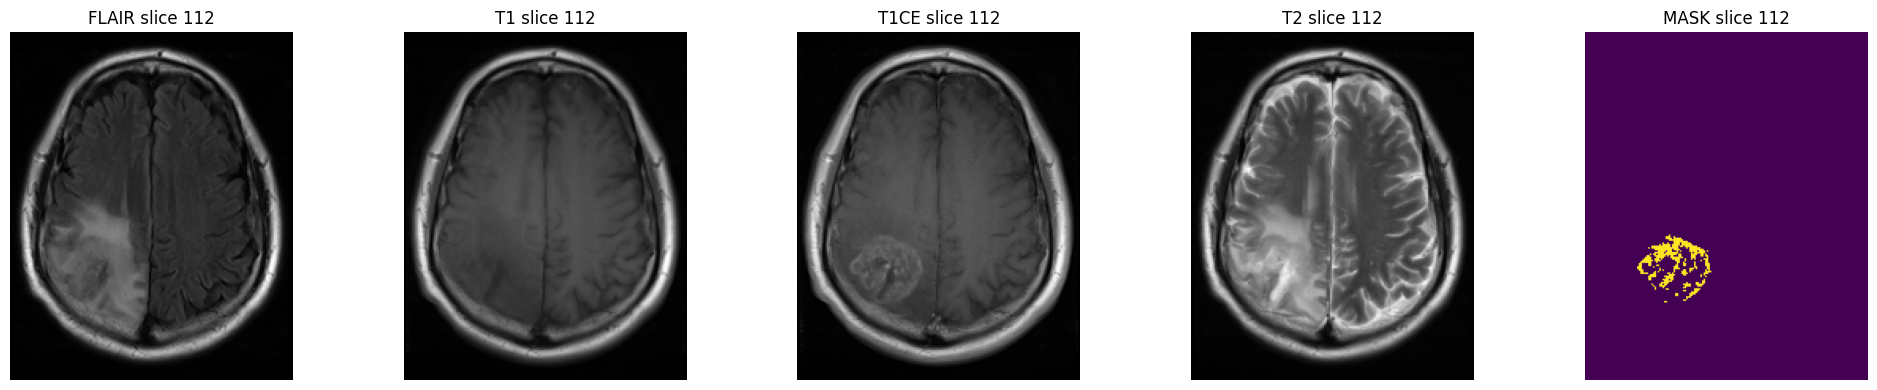

In [24]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id:      PGBM-001 처럼 케이스 이름
    date_folder:  "04-02-1992-..." 처럼 날짜별 서브폴더. None이면 첫 번째를 자동 선택
    mods:         시각화할 모달리티 리스트. 기본 ['flair','t1','t1ce','t2','mask']
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 날짜별 서브디렉토리 목록
    dates = sorted([d for d in os.listdir(case_dir)
                    if os.path.isdir(os.path.join(case_dir,d))])
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    # 각 모달리티 파일 경로
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 파일의 shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")

    # 2) 마스크가 있는 축(z) 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()
    # saved as (X, Y, Z)
    zs = np.where(mask.sum(axis=(0,1)) > 0)[0]
    if len(zs)>0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[2]//2

    # 시각화
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods),4))
    for ax,m in zip(axs, mods):
        vol = nib.load(fpaths[m]).get_fdata()          # (X,Y,Z)
        slice_axial = vol[:, :, z0]                     # axial slice
        slice_rot    = np.rot90(slice_axial, k=3)       # 90° 회전

        ax.imshow(slice_rot,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ────────────────────────────────────────────────────────────
# 사용 예시
preproc_root = "../data/btp_preproc_new"
case_id      = "PGBM-001"

# date_folder를 지정하고 싶으면 두 번째 인자로 넘겨주면 됩니다.
# 예: show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")
show_btp_case(preproc_root, case_id)


flair shape: (179, 220, 162)
t1 shape: (179, 220, 162)
t1ce shape: (179, 220, 162)
t2 shape: (179, 220, 162)
mask shape: (179, 220, 162)


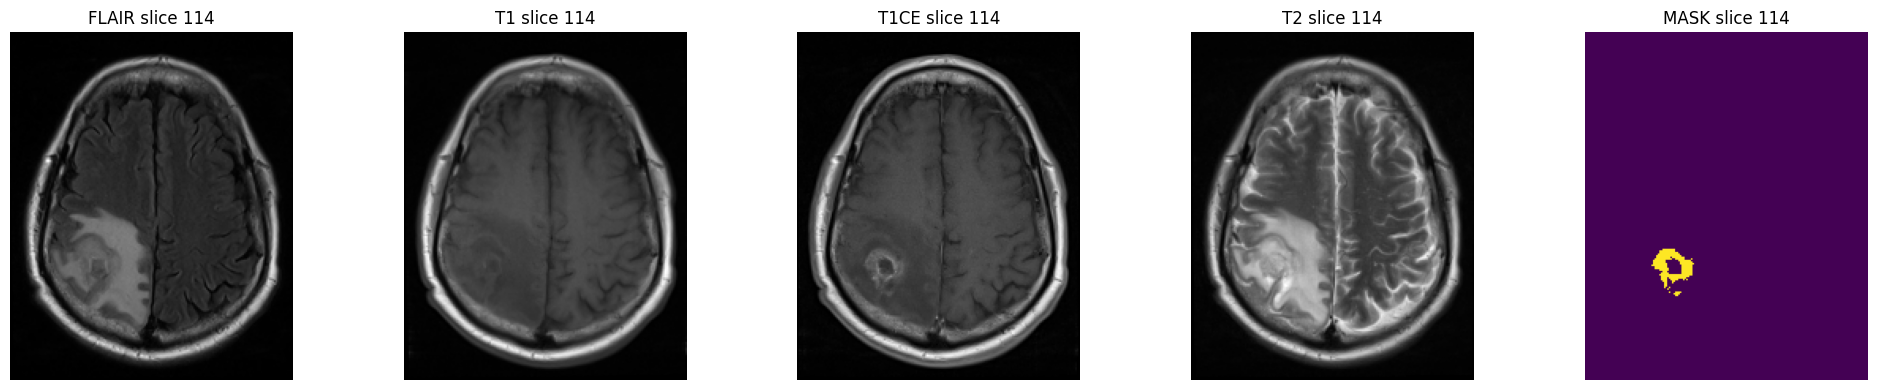

In [25]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id:      PGBM-001 처럼 케이스 이름
    date_folder:  "04-02-1992-..." 처럼 날짜별 서브폴더. None이면 첫 번째를 자동 선택
    mods:         시각화할 모달리티 리스트. 기본 ['flair','t1','t1ce','t2','mask']
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 날짜별 서브디렉토리 목록
    dates = sorted([d for d in os.listdir(case_dir)
                    if os.path.isdir(os.path.join(case_dir,d))])
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    # 각 모달리티 파일 경로
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 파일의 shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")

    # 2) 마스크가 있는 축(z) 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()
    # saved as (X, Y, Z)
    zs = np.where(mask.sum(axis=(0,1)) > 0)[0]
    if len(zs)>0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[2]//2

    # 시각화
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods),4))
    for ax,m in zip(axs, mods):
        vol = nib.load(fpaths[m]).get_fdata()          # (X,Y,Z)
        slice_axial = vol[:, :, z0]                     # axial slice
        slice_rot    = np.rot90(slice_axial, k=3)       # 90° 회전

        ax.imshow(slice_rot,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ────────────────────────────────────────────────────────────
# 사용 예시
preproc_root = "../data/btp_preproc_new"
case_id      = "PGBM-001"

# date_folder를 지정하고 싶으면 두 번째 인자로 넘겨주면 됩니다.
# 예: show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")
show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")


flair shape: (179, 220, 156)
t1 shape: (179, 220, 156)
t1ce shape: (179, 220, 156)
t2 shape: (179, 220, 156)
mask shape: (179, 220, 156)


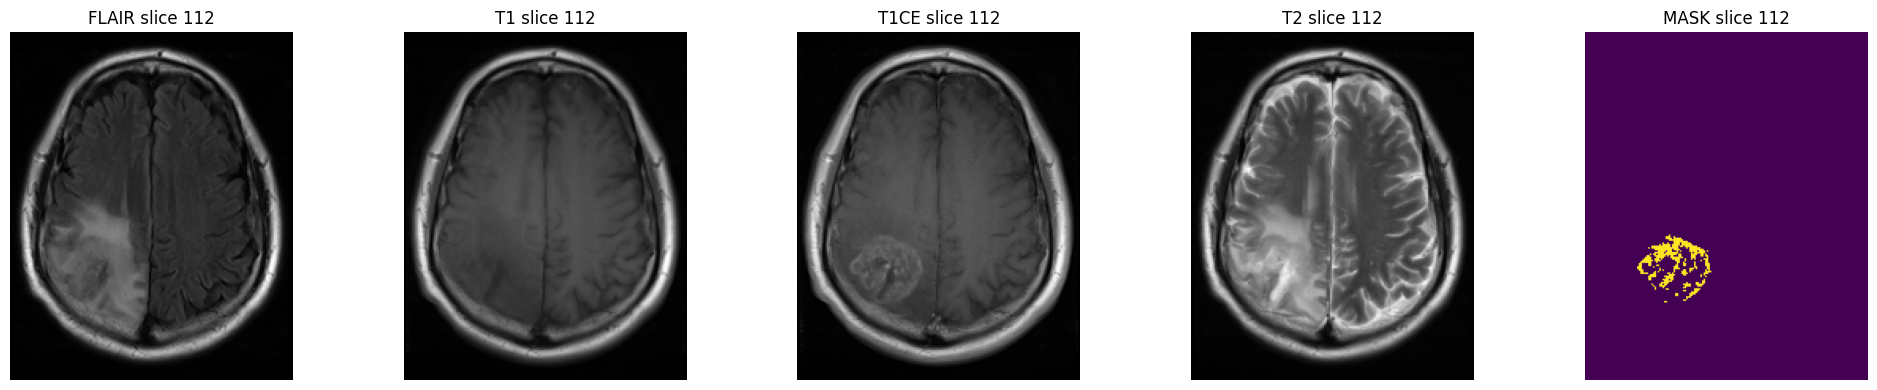

In [26]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id:      PGBM-001 처럼 케이스 이름
    date_folder:  "04-02-1992-..." 처럼 날짜별 서브폴더. None이면 첫 번째를 자동 선택
    mods:         시각화할 모달리티 리스트. 기본 ['flair','t1','t1ce','t2','mask']
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 날짜별 서브디렉토리 목록
    dates = sorted([d for d in os.listdir(case_dir)
                    if os.path.isdir(os.path.join(case_dir,d))])
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    # 각 모달리티 파일 경로
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 파일의 shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")

    # 2) 마스크가 있는 축(z) 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()
    # saved as (X, Y, Z)
    zs = np.where(mask.sum(axis=(0,1)) > 0)[0]
    if len(zs)>0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[2]//2

    # 시각화
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods),4))
    for ax,m in zip(axs, mods):
        vol = nib.load(fpaths[m]).get_fdata()          # (X,Y,Z)
        slice_axial = vol[:, :, z0]                     # axial slice
        slice_rot    = np.rot90(slice_axial, k=3)       # 90° 회전

        ax.imshow(slice_rot,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ────────────────────────────────────────────────────────────
# 사용 예시
preproc_root = "../data/btp_preproc_new"
case_id      = "PGBM-001"

# date_folder를 지정하고 싶으면 두 번째 인자로 넘겨주면 됩니다.
# 예: show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")
show_btp_case(preproc_root, case_id)


flair shape: (179, 220, 162)
t1 shape: (179, 220, 162)
t1ce shape: (179, 220, 162)
t2 shape: (179, 220, 162)
mask shape: (179, 220, 162)


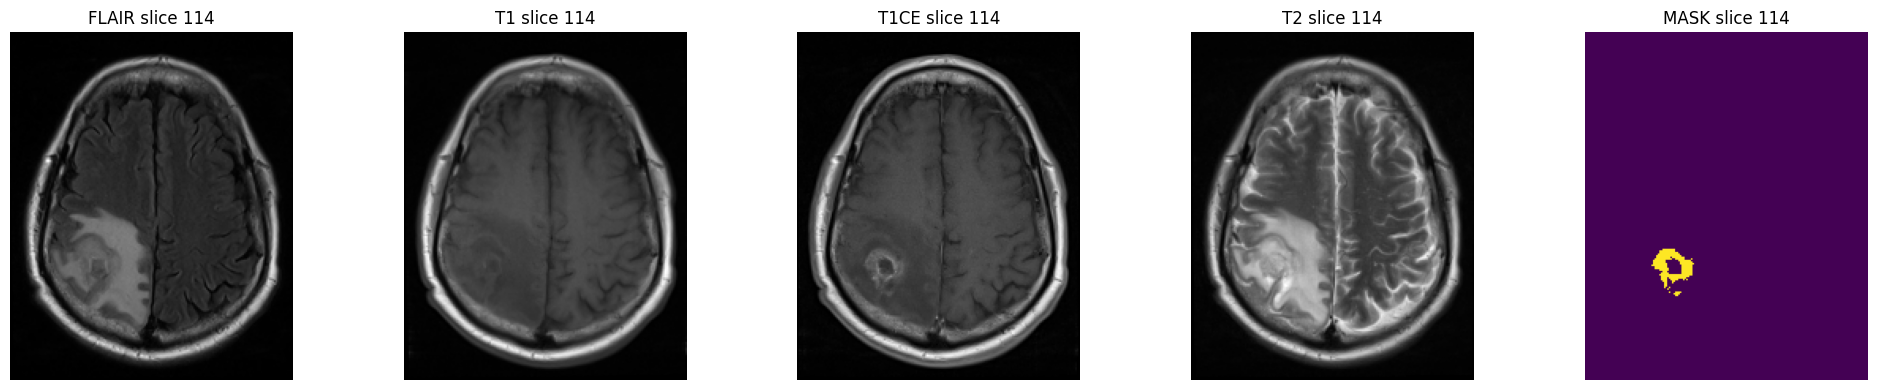

In [27]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id:      PGBM-001 처럼 케이스 이름
    date_folder:  "04-02-1992-..." 처럼 날짜별 서브폴더. None이면 첫 번째를 자동 선택
    mods:         시각화할 모달리티 리스트. 기본 ['flair','t1','t1ce','t2','mask']
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 날짜별 서브디렉토리 목록
    dates = sorted([d for d in os.listdir(case_dir)
                    if os.path.isdir(os.path.join(case_dir,d))])
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    # 각 모달리티 파일 경로
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 파일의 shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")

    # 2) 마스크가 있는 축(z) 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()
    # saved as (X, Y, Z)
    zs = np.where(mask.sum(axis=(0,1)) > 0)[0]
    if len(zs)>0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[2]//2

    # 시각화
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods),4))
    for ax,m in zip(axs, mods):
        vol = nib.load(fpaths[m]).get_fdata()          # (X,Y,Z)
        slice_axial = vol[:, :, z0]                     # axial slice
        slice_rot    = np.rot90(slice_axial, k=3)       # 90° 회전

        ax.imshow(slice_rot,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ────────────────────────────────────────────────────────────
# 사용 예시
preproc_root = "../data/btp_preproc_new"
case_id      = "PGBM-001"

# date_folder를 지정하고 싶으면 두 번째 인자로 넘겨주면 됩니다.
# 예: show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")
show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")


flair shape: (240, 240, 155)
t1 shape: (240, 240, 155)
t1ce shape: (240, 240, 155)
t2 shape: (240, 240, 155)
mask shape: (240, 240, 155)


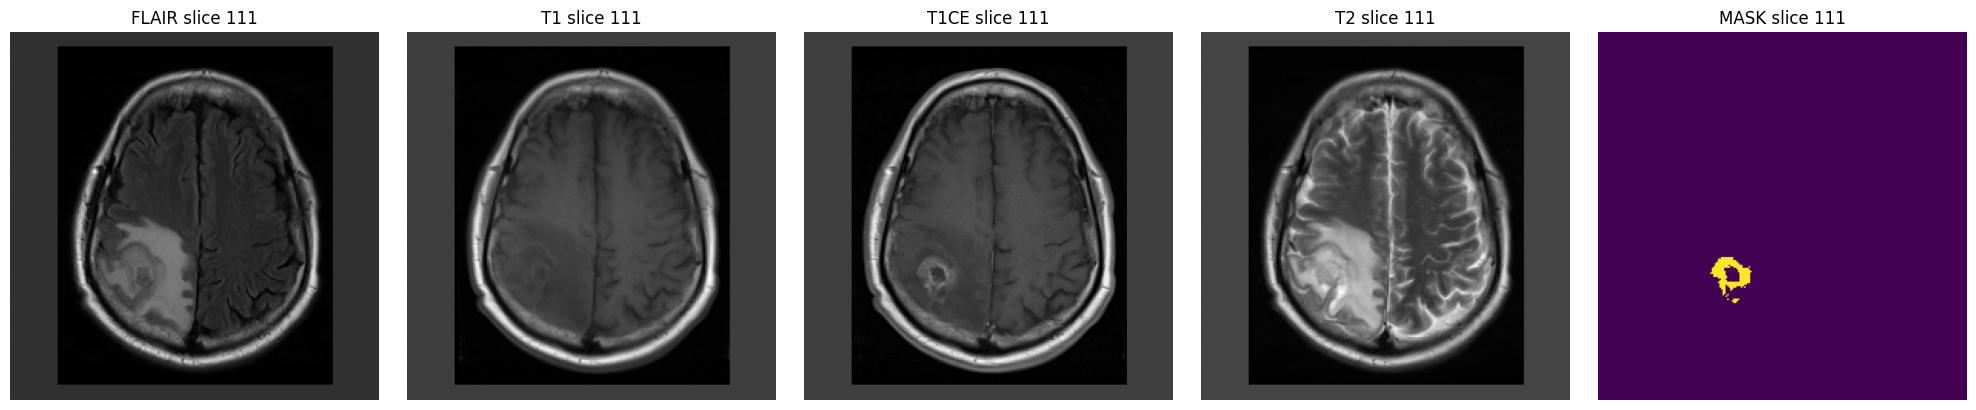

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id:      PGBM-001 처럼 케이스 이름
    date_folder:  "04-02-1992-..." 처럼 날짜별 서브폴더. None이면 첫 번째를 자동 선택
    mods:         시각화할 모달리티 리스트. 기본 ['flair','t1','t1ce','t2','mask']
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 날짜별 서브디렉토리 목록
    dates = sorted([d for d in os.listdir(case_dir)
                    if os.path.isdir(os.path.join(case_dir,d))])
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    # 각 모달리티 파일 경로
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 파일의 shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")

    # 2) 마스크가 있는 축(z) 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()
    # saved as (X, Y, Z)
    zs = np.where(mask.sum(axis=(0,1)) > 0)[0]
    if len(zs)>0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[2]//2

    # 시각화
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods),4))
    for ax,m in zip(axs, mods):
        vol = nib.load(fpaths[m]).get_fdata()          # (X,Y,Z)
        slice_axial = vol[:, :, z0]                     # axial slice
        slice_rot    = np.rot90(slice_axial, k=3)       # 90° 회전

        ax.imshow(slice_rot,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ────────────────────────────────────────────────────────────
# 사용 예시
preproc_root = "../data/btp_preproc"
case_id      = "PGBM-001"

# date_folder를 지정하고 싶으면 두 번째 인자로 넘겨주면 됩니다.
# 예: show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")
show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")


flair shape: (240, 240, 155)
t1 shape: (240, 240, 155)
t1ce shape: (240, 240, 155)
t2 shape: (240, 240, 155)
mask shape: (240, 240, 155)


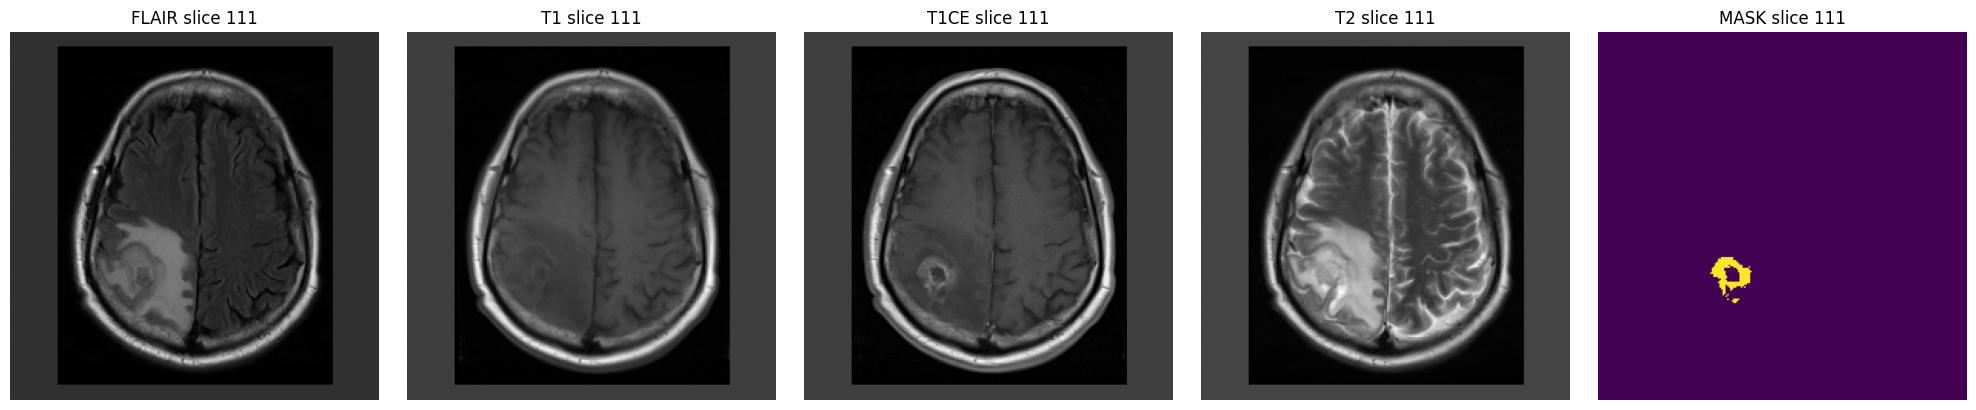

In [19]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id:      PGBM-001 처럼 케이스 이름
    date_folder:  "04-02-1992-..." 처럼 날짜별 서브폴더. None이면 첫 번째를 자동 선택
    mods:         시각화할 모달리티 리스트. 기본 ['flair','t1','t1ce','t2','mask']
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 날짜별 서브디렉토리 목록
    dates = sorted([d for d in os.listdir(case_dir)
                    if os.path.isdir(os.path.join(case_dir,d))])
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    # 각 모달리티 파일 경로
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 파일의 shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")

    # 2) 마스크가 있는 축(z) 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()
    # saved as (X, Y, Z)
    zs = np.where(mask.sum(axis=(0,1)) > 0)[0]
    if len(zs)>0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[2]//2

    # 시각화
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods),4))
    for ax,m in zip(axs, mods):
        vol = nib.load(fpaths[m]).get_fdata()          # (X,Y,Z)
        slice_axial = vol[:, :, z0]                     # axial slice
        slice_rot    = np.rot90(slice_axial, k=3)       # 90° 회전

        ax.imshow(slice_rot,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ────────────────────A────────────────────────────────────────
# 사용 예시
preproc_root = "../data/btp_preproc"
case_id      = "PGBM-001"

# date_folder를 지정하고 싶으면 두 번째 인자로 넘겨주면 됩니다.
# 예: show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")
show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")


flair shape: (240, 240, 155)
t1 shape: (240, 240, 155)
t1ce shape: (240, 240, 155)
t2 shape: (240, 240, 155)
mask shape: (240, 240, 155)


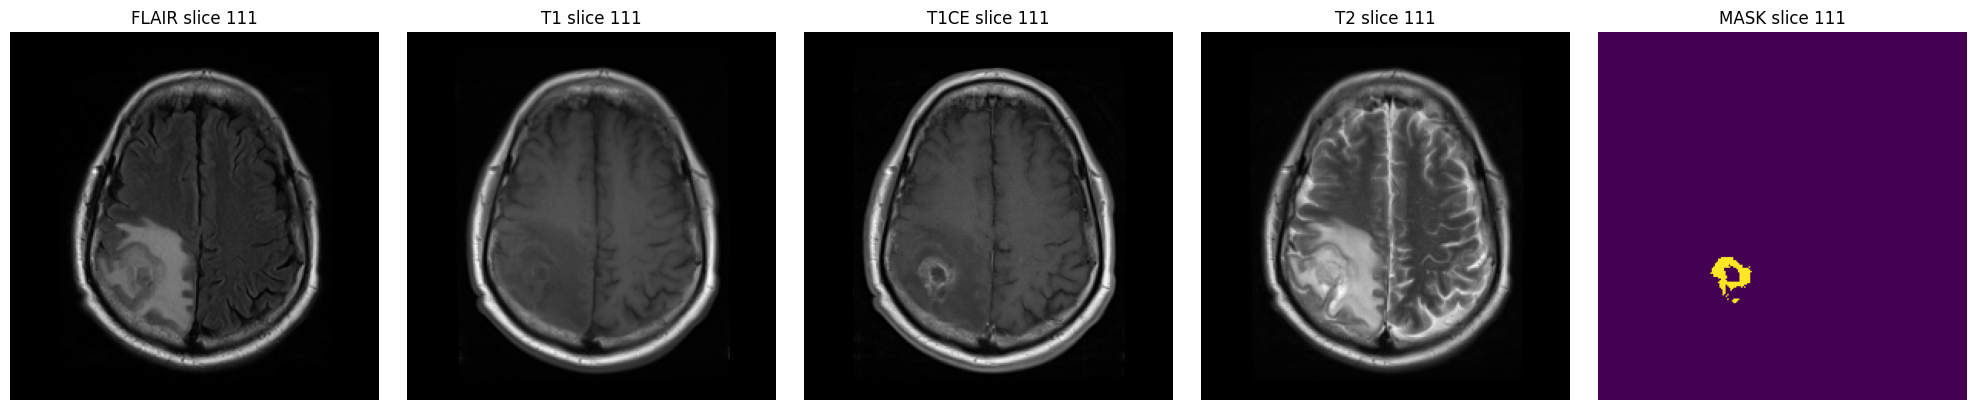

In [20]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id:      PGBM-001 처럼 케이스 이름
    date_folder:  "04-02-1992-..." 처럼 날짜별 서브폴더. None이면 첫 번째를 자동 선택
    mods:         시각화할 모달리티 리스트. 기본 ['flair','t1','t1ce','t2','mask']
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 날짜별 서브디렉토리 목록
    dates = sorted([d for d in os.listdir(case_dir)
                    if os.path.isdir(os.path.join(case_dir,d))])
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    # 각 모달리티 파일 경로
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 파일의 shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")

    # 2) 마스크가 있는 축(z) 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()
    # saved as (X, Y, Z)
    zs = np.where(mask.sum(axis=(0,1)) > 0)[0]
    if len(zs)>0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[2]//2

    # 시각화
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods),4))
    for ax,m in zip(axs, mods):
        vol = nib.load(fpaths[m]).get_fdata()          # (X,Y,Z)
        slice_axial = vol[:, :, z0]                     # axial slice
        slice_rot    = np.rot90(slice_axial, k=3)       # 90° 회전

        ax.imshow(slice_rot,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ────────────────────A────────────────────────────────────────
# 사용 예시
preproc_root = "../data/btp_preproc"
case_id      = "PGBM-001"

# date_folder를 지정하고 싶으면 두 번째 인자로 넘겨주면 됩니다.
# 예: show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")
show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")


flair shape: (240, 240, 155)
t1 shape: (240, 240, 155)
t1ce shape: (240, 240, 155)
t2 shape: (240, 240, 155)
mask shape: (240, 240, 155)


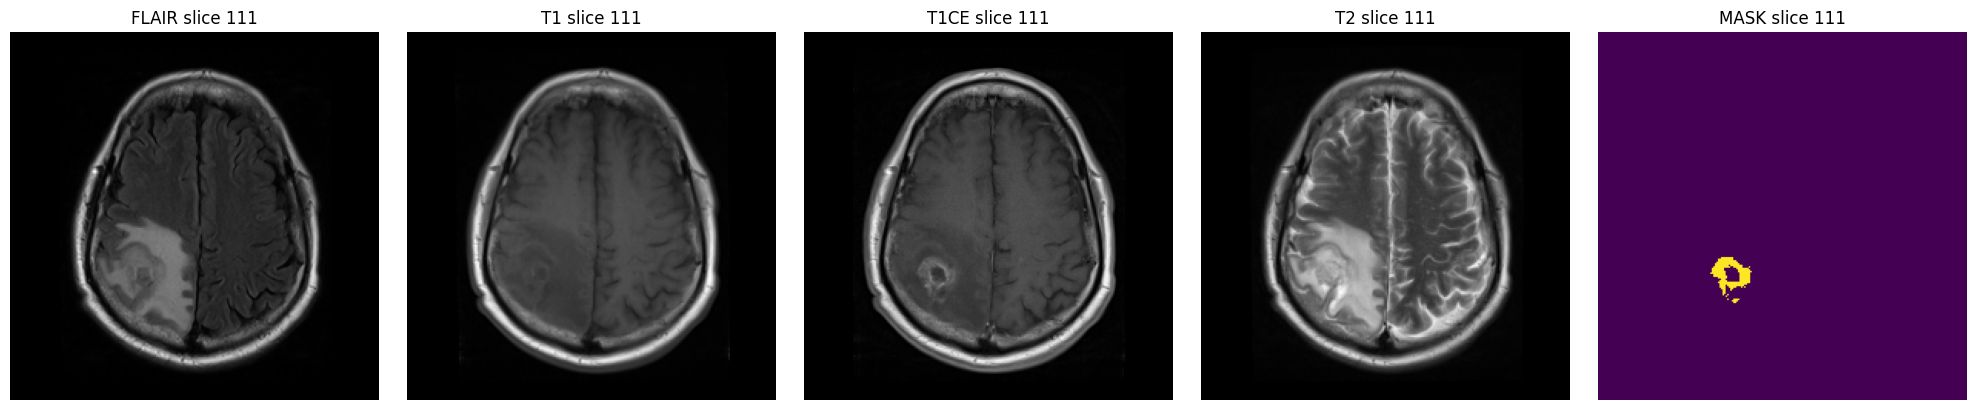

In [21]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더 (예: "../data/btp_preproc_new")
    case_id:      PGBM-001 처럼 케이스 이름
    date_folder:  "04-02-1992-..." 처럼 날짜별 서브폴더. None이면 첫 번째를 자동 선택
    mods:         시각화할 모달리티 리스트. 기본 ['flair','t1','t1ce','t2','mask']
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    # 날짜별 서브디렉토리 목록
    dates = sorted([d for d in os.listdir(case_dir)
                    if os.path.isdir(os.path.join(case_dir,d))])
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    # 각 모달리티 파일 경로
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 파일의 shape 찍어보기
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")

    # 2) 마스크가 있는 축(z) 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()
    # saved as (X, Y, Z)
    zs = np.where(mask.sum(axis=(0,1)) > 0)[0]
    if len(zs)>0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[2]//2

    # 시각화
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods),4))
    for ax,m in zip(axs, mods):
        vol = nib.load(fpaths[m]).get_fdata()          # (X,Y,Z)
        slice_axial = vol[:, :, z0]                     # axial slice
        slice_rot    = np.rot90(slice_axial, k=3)       # 90° 회전

        ax.imshow(slice_rot,
                  cmap="gray" if m!="mask" else "viridis",
                  aspect="equal")
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ────────────────────A────────────────────────────────────────
# 사용 예시
preproc_root = "../data/btp_preproc"
case_id      = "PGBM-001"

# date_folder를 지정하고 싶으면 두 번째 인자로 넘겨주면 됩니다.
# 예: show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")
show_btp_case(preproc_root, case_id, date_folder="11-19-1991-FH-HEADBrain Protocols-40993")


flair shape: (155, 240, 240)
t1 shape: (155, 240, 240)
t1ce shape: (155, 240, 240)
t2 shape: (155, 240, 240)
mask shape: (155, 240, 240)


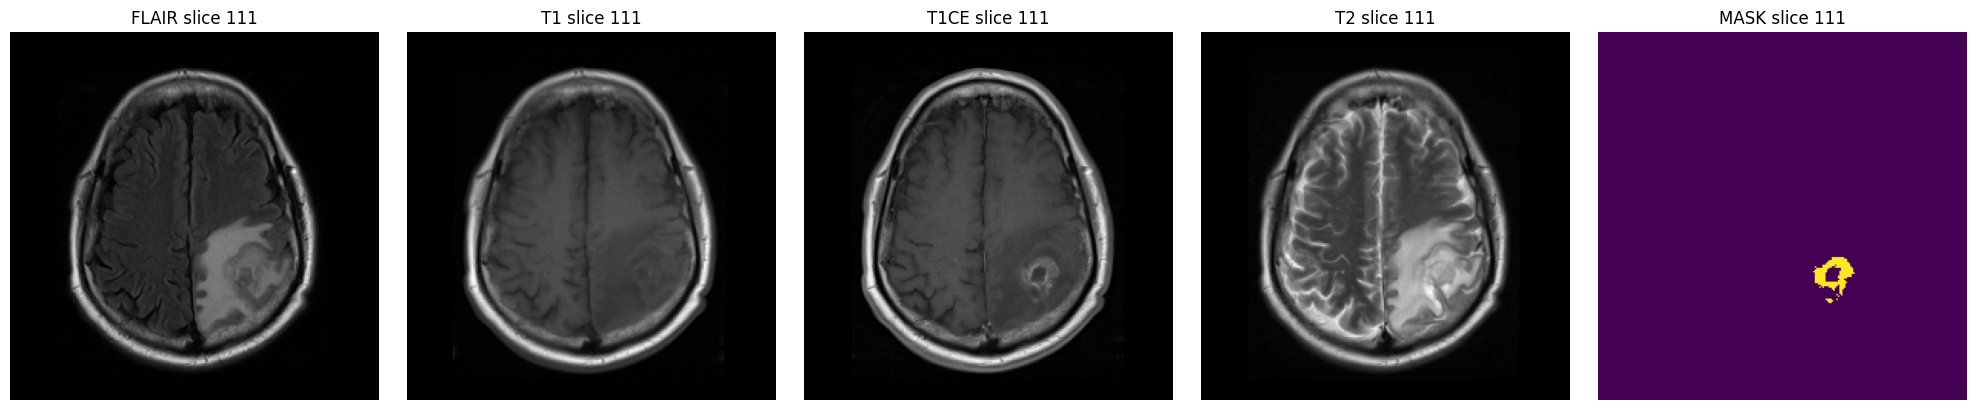

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더
    case_id:      'PGBM-001' 같은 케이스 이름
    date_folder:  날짜별 서브폴더. None이면 첫 번째 자동 선택
    mods:         ['flair','t1','t1ce','t2','mask'] 등 표시할 모달리티
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    dates = sorted(d for d in os.listdir(case_dir)
                   if os.path.isdir(os.path.join(case_dir, d)))
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 모달리티 shape 출력
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")  # now (Z, Y, X)

    # 2) 마스크가 있는 Z 인덱스 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()  # (Z, Y, X)
    zs = np.where(mask.sum(axis=(1,2)) > 0)[0]
    if len(zs) > 0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[0] // 2

    # 3) 시각화
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods), 4))
    for ax, m in zip(axs, mods):
        vol = nib.load(fpaths[m]).get_fdata()     # (Z, Y, X)
        slice_img = vol[z0, :, :]                 # pick axial slice at Z = z0

        ax.imshow(
            slice_img,
            cmap="gray" if m != "mask" else "viridis",
            aspect="equal"
        )
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ─────────────────────────── 사용 예시 ───────────────────────────
preproc_root = "../data/btp_preproc"
case_id      = "PGBM-001"
show_btp_case(preproc_root, case_id,
              date_folder="11-19-1991-FH-HEADBrain Protocols-40993")

show_btp_case(preproc_root, case_id,
              date_folder="11-19-1991-FH-HEADBrain Protocols-40993")

flair shape: (155, 240, 240)
t1 shape: (155, 240, 240)
t1ce shape: (155, 240, 240)
t2 shape: (155, 240, 240)
mask shape: (155, 240, 240)


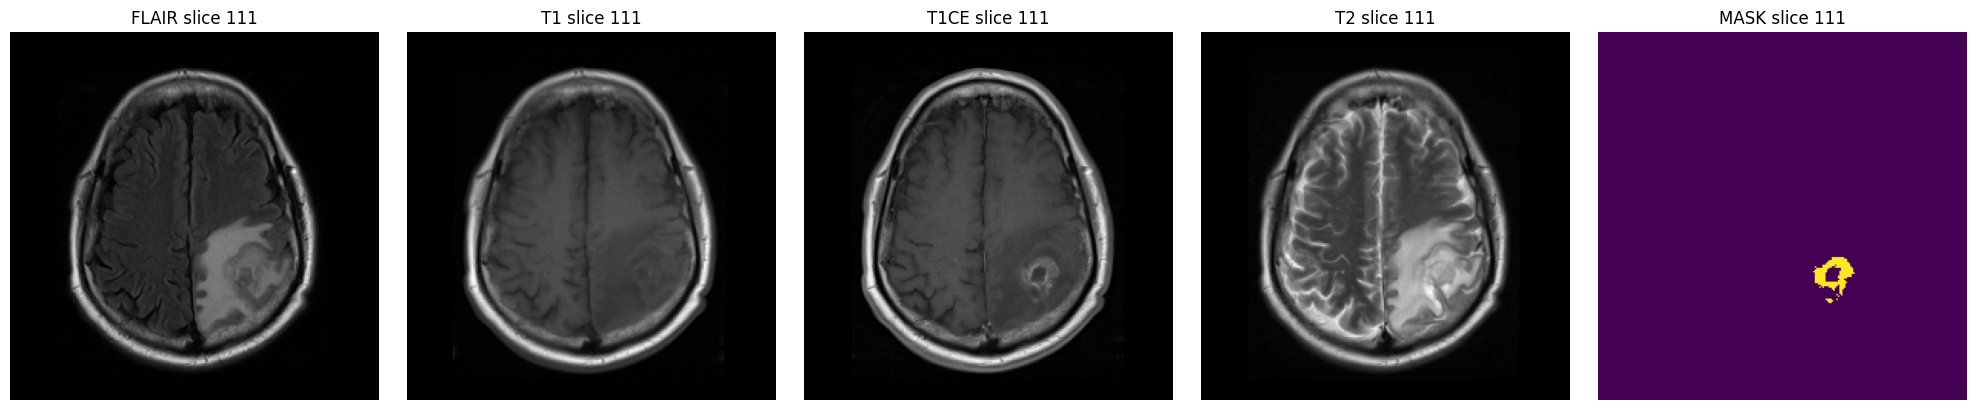

flair shape: (155, 240, 240)
t1 shape: (155, 240, 240)
t1ce shape: (155, 240, 240)
t2 shape: (155, 240, 240)
mask shape: (155, 240, 240)


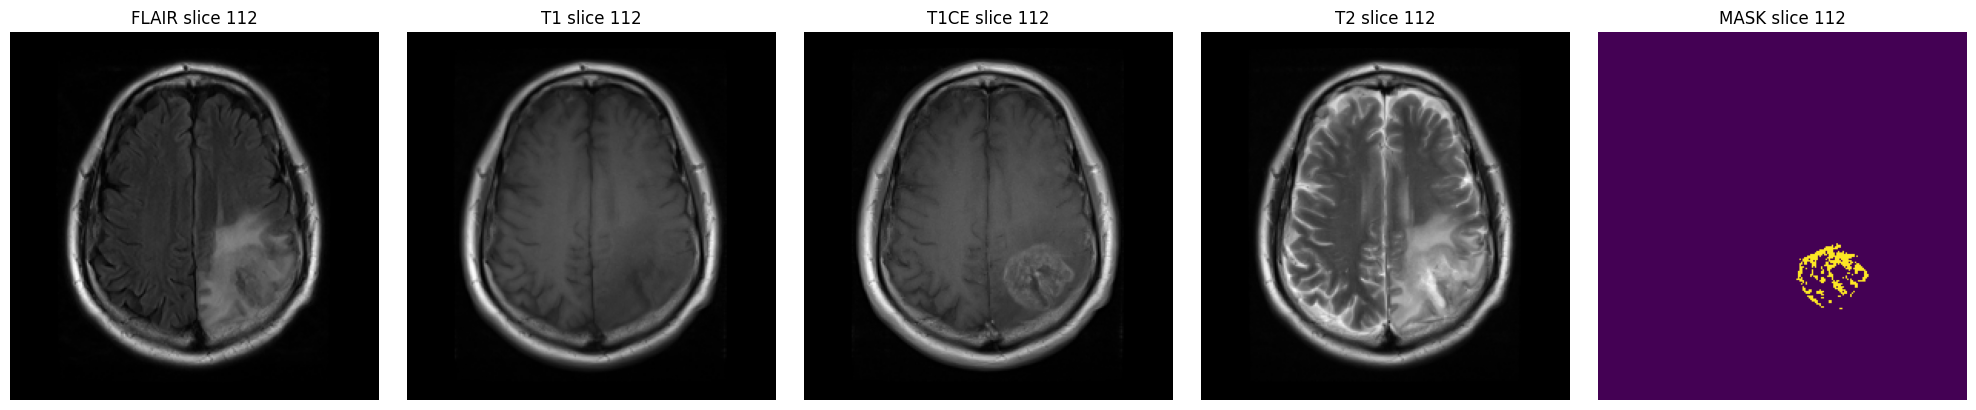

In [2]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_btp_case(preproc_root, case_id, date_folder=None, mods=None):
    """
    preproc_root: 전처리된 BTP 루트 폴더
    case_id:      'PGBM-001' 같은 케이스 이름
    date_folder:  날짜별 서브폴더. None이면 첫 번째 자동 선택
    mods:         ['flair','t1','t1ce','t2','mask'] 등 표시할 모달리티
    """
    if mods is None:
        mods = ["flair","t1","t1ce","t2","mask"]

    case_dir = os.path.join(preproc_root, case_id)
    dates = sorted(d for d in os.listdir(case_dir)
                   if os.path.isdir(os.path.join(case_dir, d)))
    if not dates:
        raise RuntimeError(f"No date folders under {case_dir}")
    if date_folder is None:
        date_folder = dates[0]
    if date_folder not in dates:
        raise ValueError(f"{date_folder!r} not in {dates}")

    in_dir = os.path.join(case_dir, date_folder)
    fpaths = {m: os.path.join(in_dir, f"{m}.nii.gz") for m in mods}

    # 1) 각 모달리티 shape 출력
    for m, p in fpaths.items():
        arr = nib.load(p).get_fdata()
        print(f"{m} shape: {arr.shape}")  # now (Z, Y, X)

    # 2) 마스크가 있는 Z 인덱스 찾기
    mask = nib.load(fpaths["mask"]).get_fdata()  # (Z, Y, X)
    zs = np.where(mask.sum(axis=(1,2)) > 0)[0]
    if len(zs) > 0:
        z0 = zs[len(zs)//2]
    else:
        z0 = mask.shape[0] // 2

    # 3) 시각화
    fig, axs = plt.subplots(1, len(mods), figsize=(4*len(mods), 4))
    for ax, m in zip(axs, mods):
        vol = nib.load(fpaths[m]).get_fdata()     # (Z, Y, X)
        slice_img = vol[z0, :, :]                 # pick axial slice at Z = z0

        ax.imshow(
            slice_img,
            cmap="gray" if m != "mask" else "viridis",
            aspect="equal"
        )
        ax.set_title(f"{m.upper()} slice {z0}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# ─────────────────────────── 사용 예시 ───────────────────────────
preproc_root = "../data/btp_preproc"
case_id      = "PGBM-001"
show_btp_case(preproc_root, case_id,
              date_folder="1991-11-19")

show_btp_case(preproc_root, case_id,
              date_folder="1992-04-02")